## Relatório
### Daniel Ruhman e Marcelo Terreiro Prado

O projeto a seguir foi realizado para a disciplina de Matemática Multivariada ministrada pelo Professor Fabio Orfali no curso de Engenharia do INSPER.
Ele tem como objetivo o desenvolvimento de uma simulação computacional baseada em métodos numéricos (mais especificamente a aproximação de uma curva por uma linha poligonal composta por _n_ segmentos) para calcular o tempo aproximado que um objeto, sujeito apenas à força da gravidade, leva para percorrer uma trajetória dada por curvas parametrizadas e pontos iniciais e finais ou domínio.

In [30]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import math

## Dedução	geométrica	da	parametrização	da	cicloide

Considere uma circunferência C de raio _r_ com um ponto P, fixo. Ao rolar a circunferência sobre uma reta (eixo x), o ponto P percorre uma curva chamada de ciclóide. Queremos descobrir quanto a curva "caminhou" em cada eixo. A seguir, apresentamos a dedução geométrica para sua parametrização, partindo dos seguintes pressupostos:

* _θ_ = 0 no início, gira _θ_ radianos;
* o ponto P coincide com a origem do sistema de coordenadas no início do movimento;

<img src="circunf.png",width=300,height=300>

Podemos então escrever:

<img src="equacoes.png",width=200,height=200>

Com os deslocamentos de x e y em mãos, precisamos descobrir os segmentos de reta para determinar as parametrizações em relação ao parâmetro _θ_. Começemos por OT. Como C está em contato com a reta, deduzimos que:

<img src="ot.png",width=200,height=200>

Podemos deduzir pela figura os outros 3 segmentos restantes:

<img src="seg.png",width=200,height=200>

Agora resta substituir os segmentos encontrados nas equações 1 e 2 e obtemos a parametrização final:

<img src="param.png",width=300,height=300>

## Modelo Computacional

O modelo desenvolvido pelo grupo encontra-se explicado abaixo. Inicialmente, declaramos as variáveis que irão armazenar as parametrizações, além de definir alguns parâmetros e algumas burocracias de código. Também definimos o dominios das parametrizações.
##### Coloque a sua parametrização e o domínio nas variáveis abaixo 

In [31]:
def retornaParametrizacao (t):
    # Parametrização em X
    xParam = np.cos(t)
    # Parametrização em Y
    yParam = np.sin(t)
    return (xParam, yParam)
    

dominioMin = np.pi
dominioMax = (3*np.pi) / 2

In [32]:
v0 = 0
tTotal = 0
distTotal = 0
precisao = 0.01
delta = np.arange(dominioMin,dominioMax, precisao)
gravidade = 9.81

xMax, yMax = retornaParametrizacao(dominioMin)
listaX = []
listaY = []

Depois, declaramos uma função cujo objetivo é achar os segmentos de reta que usaremos para aproximar a curva. Esses segmentos são, como mostra a imagem, a hipotenusa entre dois pontos da curva. A diferença entre esses pontos é a precisão do cálculo. Quanto menor a diferença entre eles, melhor a aproximação. A função recebe os pontos para os quais calcular o segmento de reta, obtidos através da função acima. Além disso, ela retorna o angulo de inclinação das retas que irá nos ajudar a calcular o tempo.

<img src="hip.png",width=300,height=300>

In [33]:
def findHipotenusa (x0, x1, y0, y1):
    deltaX = x1 - x0
    deltaY = y1 - y0
    # Em radiano
    angulo = np.arctan(deltaY/deltaX)
    return np.sqrt((deltaX**2) + (deltaY**2)), angulo

Então, declaramos uma função que irá nos retornar o tempo de percurso de cada segmento de reta. Ela recebe como parametros o angulo de inclinação, a distância (hipotenusa) e a velocidade inicial. E ela retorna o tempo de percurso e a velocidade final (que será utilizada como inicial para o próximo segmento na próxima iteração, e assim por diante).
Para calcular o tempo, utilizamos a equação:
<img src="equacao.png">
Como já possuimos os parametros _ΔS_ (tamanho do segmento/hipotenusa), _v0_ (inicialmente 0, depois igual a velocidade final no segmento anterior) e _a_ (aceleração da gravidade), só precisamos isolar o _t_.

In [45]:
# Formula usada
# dist = v0*t + (a*(t**2))/2
def retornaTempo (teta, dist, v0):
    a = gravidade * np.sin(teta)
    delta = v0**2 + 2*a*dist
    
    if (delta < 0):
        print('err0')
        return (0,0)
    else:
        t1 = (-v0 + np.sqrt(delta))/a
        t2 = (-v0 - np.sqrt(delta))/a
#     delta = 4*(v0**2) + 8*a*dist
#     t1 = (-2*v0 + np.sqrt(delta))/(2*a)
    #t2 = (-2*v0 - np.sqrt(delta))/(2*a)
        v = v0 + a*t1 
        return (t1,v)

Por fim, contruímos o loop que junta todas essa funções. Ele roda para cada intervalo de precisão definido, e tem o seguinte comportamento: 
* Primeiro, descobre as coordenadas dos dois pontos do segmento aproximado por reta, com base na precisão pré definida
* Depois, descobre o comprimento dessa reta (hipotenusa) e o seu angulo de inclinação, usando seu ponto inicial e final.
* Então, calcula o tempo necessário para percorrer tal segmento e o adiciona ao tempo total para percorrer a curva.
* Isso é repetido para cada intervalo de precisão definido, até percorrer a curva inteira.

Por fim, imprime os valores (nesse caso, **um quarto de circunferencia**):

A bolinha não consegue subir essa curva. O Y máximo é -5.0


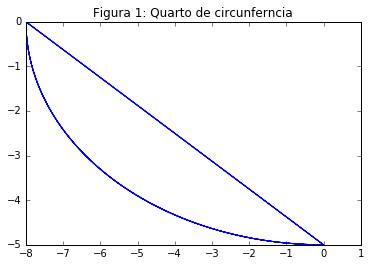

In [46]:
consegueSubir = True

for t in delta:
    
    x0, y0 = retornaParametrizacao(t)

    listaX.append(x0)
    listaY.append(y0)
    x1, y1 = retornaParametrizacao(t + precisao)
    
    if (y1 > yMax):
        consegueSubir = False
    
    hip, angulo = findHipotenusa(x0,x1,y0,y1)
    distTotal += hip
    t1, v = retornaTempo(angulo, hip, v0)
    v0 = v
    tTotal += t1
    
if consegueSubir: 
    print("Tempo total (s)")
    print(tTotal)
    print('Distância total (m)')
    print(distTotal)

else:
    print('A bolinha não consegue subir essa curva. O Y máximo é {0}'.format(yMax))
    
plt.plot(listaX,listaY)
plt.title('Figura 1: Quarto de circunferncia')
plt.show()

## Validação

Abaixo está a validação da nossa simulação computacional. Nela, utilizamos uma reta parametrizada. Olhando seu domínio, fica claro que a distância percorrida faz sentido. Utilizando pitágoras, pode-se perceber que a distância vale raiz quadradada de 200, o que bate com nosso resultado.

Para o cálculo do tempo, utilizamos uma reta vertical definida com x constante. Em seguida, calculamos o tempo que levaria para a bolinha percorrer o trajeto inteiro e validamos utilizando a física. Esse tempo precisa ser igual ao tempo necessário para ela cair em queda-livre.

### Reta para validação da distância

err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0
err0


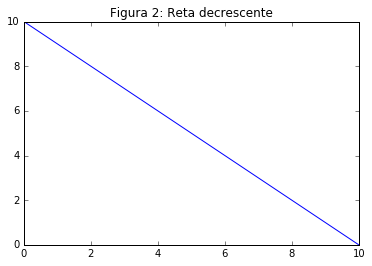

In [47]:
def retornaParametrizacao (t):
    # Parametrização em X
    xParam = t
    # Parametrização em Y
    yParam = 10 - t
    return (xParam, yParam)
    

dominioMin = 0
dominioMax = 10
v0 = 0
tTotal = 0
distTotal = 0
precisao = 0.01
delta = np.arange(dominioMin,dominioMax, precisao)
gravidade = 9.81

xMax, yMax = retornaParametrizacao(dominioMin)
listaX = []
listaY = []
consegueSubir = True

for t in delta:
    x0, y0 = retornaParametrizacao(t)

    listaX.append(x0)
    listaY.append(y0)
    x1, y1 = retornaParametrizacao(t + precisao)
    
    if (np.abs(y1) > np.abs(yMax)):
        consegueSubir = False
    
    hip, angulo = findHipotenusa(x0,x1,y0,y1)
    distTotal += hip
    t1, v = retornaTempo(angulo, hip, v0)
    v0 = v
    tTotal += t1
    
if consegueSubir: 
    print("Tempo total (s)")
    print(tTotal)
    print('Distância total (m)')
    print(distTotal)
else:
    print('A bolinha não consegue subir essa curva. O Y máximo é {0}'.format(yMax))

plt.plot(listaX,listaY)
plt.title('Figura 2: Reta decrescente')
plt.show()

### Reta para validação do Y máximo (conservação de energia)

0 6.93671752344 0.0141421356237 0.1962
0.442944691807 6.93671752344 0.0141421356237 0.3924
0.626418390535 6.93671752344 0.0141421356237 0.5886
0.767202711153 6.93671752344 0.0141421356237 0.7848
0.885889383614 6.93671752344 0.0141421356237 0.981
0.990454441153 6.93671752344 0.0141421356237 1.1772
1.0849884792 6.93671752344 0.0141421356237 1.3734
1.17192149908 6.93671752344 0.0141421356237 1.5696
1.25283678107 6.93671752344 0.0141421356237 1.7658
1.32883407542 6.93671752344 0.0141421356237 1.962
1.40071410359 6.93671752344 0.0141421356237 2.1582
1.4690813456 6.93671752344 0.0141421356237 2.3544
1.53440542231 6.93671752344 0.0141421356237 2.5506
1.5970597985 6.93671752344 0.0141421356237 2.7468
1.65734727803 6.93671752344 0.0141421356237 2.943
1.71551741466 6.93671752344 0.0141421356237 3.1392
1.77177876723 6.93671752344 0.0141421356237 3.3354
1.82630775063 6.93671752344 0.0141421356237 3.5316
1.8792551716 6.93671752344 0.0141421356237 3.7278
1.93075114916 6.93671752344 0.0141421356237 3

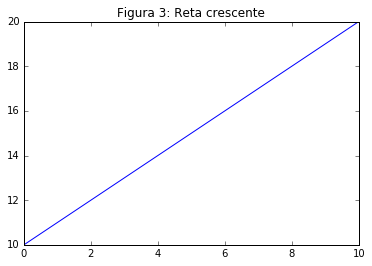

In [37]:
def retornaParametrizacao (t):
    # Parametrização em X
    xParam = t
    # Parametrização em Y
    yParam = 10 + t
    return (xParam, yParam)
    

dominioMin = 0
dominioMax = 10
v0 = 0
tTotal = 0
distTotal = 0
precisao = 0.01
delta = np.arange(dominioMin,dominioMax, precisao)
gravidade = 9.81

xMax, yMax = retornaParametrizacao(dominioMin)
listaX = []
listaY = []
consegueSubir = True

for t in delta:
    x0, y0 = retornaParametrizacao(t)

    listaX.append(x0)
    listaY.append(y0)
    x1, y1 = retornaParametrizacao(t + precisao)
    
    if (np.abs(y1) > np.abs(yMax)):
        consegueSubir = False
    
    hip, angulo = findHipotenusa(x0,x1,y0,y1)
    distTotal += hip
    t1, v = retornaTempo(angulo, hip, v0)
    v0 = v
    tTotal += t1
    
if consegueSubir: 
    print("Tempo total (s)")
    print(tTotal)
    print('distância total (m)')
    print(distTotal)
else:
    print('A bolinha não consegue subir essa curva. O Y máximo é {0}'.format(yMax))

plt.plot(listaX,listaY)
plt.title('Figura 3: Reta crescente')
plt.show()

### Validação do tempo

Tivemos bastante dificuldade para validar o tempo que a bolinha leva para percorrer determinada curva. Abaixo estão descritas as tentativas realizadas.

1. Calcular o tempo que a bolinha leva para percorrer uma reta. Tivemos problemas para calcular o tempo teórico que levaria (tanto pela literatura matemática quanto pela física), e por isso acabamos trocando de tentativa.

2. Calcular o tempo que a bolinha leva para percorrer uma reta vertical, com x constante. Da mesma forma que na tentativa acima, tivemos problemas. Dessa vez foi com o código. Ele reclamava de nossa equação utilizada na função `retornaTempo`, provavelmente devido a maneira com que dividimos a curva e distribuímos as forças. Sabendo esse tempo, utilizaríamos a fórmula da cinemática de posição em função do tempo para checarmos por valores iguais.

3. Descobrir o tempo real de uma ciclóide e comparar com o tempo calculado pela simulação. Conversamos nosso colega (Eduardo Ferrari) e testamos com a ciclóide construída por ele. Tivemos muita dificuldade para medir o tempo, que da menos de 1 segundo na rampa construída. Além disso, tivemos dificuldade em descobrir os parâmetros exatos da ciclóide construída para equacionar uma semelhante.

## Plots de Curvas Parametrizadas

### 1. Curva de um oscilador massa-mola

0 -2.83921909377 0.0104471163969 -0.0593233046978
0 -2.85961996465 0.0104540106325 -0.0597889950307
0 -2.87982690657 0.0104609016076 -0.0602511718331
0 -2.89983953794 0.0104677877338 -0.0607098094902
0 -2.91965750019 0.010474667428 -0.0611648826366
0 -2.93928045736 0.0104815391135 -0.0616163661589
0 -2.95870809559 0.0104884012196 -0.0620642351965
0 -2.97794012275 0.0104952521823 -0.0625084651439
0 -2.99697626794 0.0105020904446 -0.0629490316524
0 -3.01581628107 0.010508914457 -0.0633859106313
0 -3.0344599324 0.0105157226775 -0.0638190782499
0 -3.05290701209 0.0105225135722 -0.0642485109389
0 -3.07115732977 0.0105292856158 -0.0646741853922
0 -3.08921071407 0.0105360372913 -0.0650960785682
0 -3.10706701221 0.010542767091 -0.0655141676916
0 -3.12472608952 0.0105494735164 -0.0659284302548
0 -3.14218782903 0.0105561550787 -0.0663388440194
0 -3.159452131 0.0105628102991 -0.0667453870179
0 -3.17651891254 0.0105694377089 -0.0671480375546
0 -3.19338810708 0.0105760358501 -0.0675467742078
0 -3.2

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in sqrt


2.10300327353 0.0994630803601 0.010000514031 4.42461213232
2.10347620199 0.0986246116023 0.0100005054003 4.42658472424
2.10394503831 0.0977765043527 0.0100004967448 4.42854035147
2.10440973944 0.0969188458275 0.0100004880679 4.43047882299
2.10487026275 0.0960517241753 0.010000479373 4.43239994957
2.10532656601 0.0951752284677 0.0100004706635 4.43430354373
2.10577860748 0.0942894486907 0.0100004619429 4.43618941981
2.10622634582 0.093394475735 0.0100004532146 4.43805739398
2.10666974013 0.0924904013874 0.0100004444821 4.43990728423
2.10710874998 0.0915773183208 0.0100004357488 4.44173891041
2.10754333536 0.090655320085 0.0100004270182 4.44355209423
2.10797345672 0.0897245010973 0.0100004182937 4.44534665932
2.10839907497 0.0887849566328 0.0100004095788 4.44712243118
2.10882015145 0.0878367828147 0.0100004008768 4.44887923726
2.109236648 0.0868800766042 0.0100003921913 4.45061690694
2.10964852687 0.0859149357912 0.0100003835256 4.45233527155
2.11005575082 0.0849414589842 0.0100003748831 

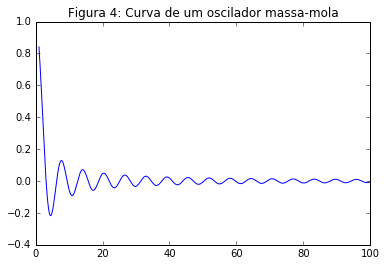

In [38]:
def retornaParametrizacao (t):
    # Parametrização em X
    xParam = t
    # Parametrização em Y
    yParam = np.sin(t) / t
    return (xParam, yParam)

dominioMin = 1
dominioMax = 100
v0 = 0
tTotal = 0
distTotal = 0
precisao = 0.01
delta = np.arange(dominioMin,dominioMax, precisao)
gravidade = 9.81

xMax, yMax = retornaParametrizacao(dominioMin)
listaX = []
listaY = []
consegueSubir = True

for t in delta:
    x0, y0 = retornaParametrizacao(t)

    listaX.append(x0)
    listaY.append(y0)
    x1, y1 = retornaParametrizacao(t + precisao)
    
    hip, angulo = findHipotenusa(x0,x1,y0,y1)
    distTotal += hip
    t1, v = retornaTempo(angulo, hip, v0)
    v0 = v
    tTotal += t1
    
if consegueSubir: 
    print("Tempo total (s)")
    print(tTotal)
    print('Distância total (m)')
    print(distTotal)
else:
    print('A bolinha não consegue subir essa curva. O Y máximo é {0}'.format(yMax))
plt.plot(listaX,listaY)
plt.title('Figura 4: Curva de um oscilador massa-mola')
plt.show()

### 2. Ciclóide
Para r =1:

0 -4.369619723 0.0223382148276 -0.195219008175
0 -4.33448818307 0.0222929576066 -0.193257122623
0 -4.29932366557 0.0222471656285 -0.191295531357
0 -4.26412759649 0.0222008401776 -0.189334430533
0 -4.22890141307 0.0221539825546 -0.187374016261
0 -4.19364656402 0.0221065940762 -0.185414484579
0 -4.15836450961 0.0220586760752 -0.183456031441
0 -4.12305672193 0.0220102299009 -0.181498852688
0 -4.08772468501 0.0219612569183 -0.179543144038
0 -4.05236989502 0.0219117585092 -0.17758910106
0 -4.01699386048 0.0218617360713 -0.175636919156
0 -3.98159810243 0.0218111910186 -0.173686793542
0 -3.94618415465 0.0217601247814 -0.171738919231
0 -3.91075356385 0.0217085388066 -0.169793491008
0 -3.87530788992 0.0216564345571 -0.167850703413
0 -3.83984870611 0.0216038135123 -0.165910750725
0 -3.80437759929 0.0215506771681 -0.163973826936
0 -3.76889617017 0.0214970270367 -0.162040125737
0 -3.73340603353 0.0214428646469 -0.160109840498
0 -3.6979088185 0.0213881915439 -0.158183164244
0 -3.66240616881 0.02133

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in sqrt


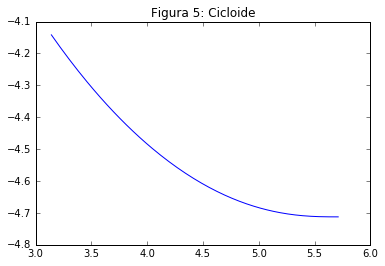

In [39]:
def retornaParametrizacao (t):
    # Parametrização em X
    xParam = (t - np.sin(t))
    # Parametrização em Y
    yParam = -(t -np.cos(t))
    return (xParam, yParam)

dominioMin = np.pi
dominioMax = 3*np.pi/2
v0 = 0
tTotal = 0
distTotal = 0
precisao = 0.01
delta = np.arange(dominioMin,dominioMax, precisao)
gravidade = 9.81

xMax, yMax = retornaParametrizacao(dominioMin)
listaX = []
listaY = []
consegueSubir = True

for t in delta:
    x0, y0 = retornaParametrizacao(t)

    listaX.append(x0)
    listaY.append(y0)
    x1, y1 = retornaParametrizacao(t + precisao)
    
    hip, angulo = findHipotenusa(x0,x1,y0,y1)
    distTotal += hip
    t1, v = retornaTempo(angulo, hip, v0)
    v0 = v
    tTotal += t1
    
if consegueSubir: 
    print("Tempo total (s)")
    print(tTotal)
    print('Distância total (m)')
    print(distTotal)
else:
    print('A bolinha não consegue subir essa curva. O Y máximo é {0}'.format(yMax))
plt.plot(listaX,listaY)
plt.title('Figura 5: Cicloide')
plt.show()

### 3. Elipse
Com a = 8 e b = 5

0 -0.03065635578 0.0799990572974 -0.00490495912514
0 -0.0919716060386 0.0799941825383 -0.0147143868836
0 -0.153294472218 0.0799844340789 -0.0245223432156
0 -0.214630031013 0.0799698140371 -0.0343278473337
0 -0.275983358229 0.0799503255902 -0.0441299186958
0 -0.337359528418 0.0799259729755 -0.0539275771026
0 -0.398763614494 0.0798967614907 -0.0637198427968
0 -0.460200687334 0.0798626974957 -0.0735057365598
0 -0.521675815358 0.0798237884128 -0.0832842798103
0 -0.583194064078 0.0797800427284 -0.0930544947023
0 -0.644760495629 0.0797314699949 -0.102815404222
0 -0.706380168251 0.0796780808317 -0.112566032288
0 -0.768058135745 0.0796198869275 -0.122305403844
0 -0.82979944688 0.0795569010425 -0.132032544961
0 -0.891609144755 0.0794891370102 -0.141746482934
0 -0.95349226611 0.0794166097406 -0.151446246377
0 -1.01545384058 0.0793393352224 -0.161130865321
0 -1.07749888988 0.0792573305259 -0.170799371313
0 -1.13963242695 0.0791706138062 -0.18045079751
0 -1.20185945499 0.0790792043068 -0.190084178

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in sqrt


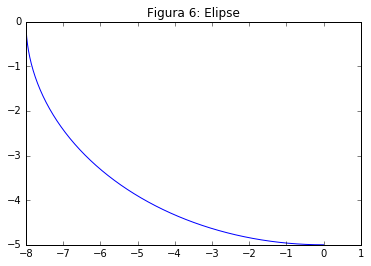

In [40]:
def retornaParametrizacao (t):
    # Parametrização em X
    xParam = 8 * np.sin(t)
    # Parametrização em Y
    yParam = 5 * np.cos(t)
    return (xParam, yParam)
    

dominioMin = np.pi
dominioMax = 3*np.pi/2
v0 = 0
tTotal = 0
distTotal = 0
precisao = 0.01
delta = np.arange(dominioMin,dominioMax, precisao)
gravidade = 9.81

xMax, yMax = retornaParametrizacao(dominioMin)
listaX = []
listaY = []
consegueSubir = True

for t in delta:
    x0, y0 = retornaParametrizacao(t)

    listaX.append(x0)
    listaY.append(y0)
    x1, y1 = retornaParametrizacao(t + precisao)
    
    if (np.abs(y1) > np.abs(yMax)):
        consegueSubir = False
    
    hip, angulo = findHipotenusa(x0,x1,y0,y1)
    distTotal += hip
    t1, v = retornaTempo(angulo, hip, v0)
    v0 = v
    tTotal += t1
    
if consegueSubir: 
    print("Tempo total (s)")
    print(tTotal)
    print('Distância total (m)')
    print(distTotal)
else:
    print('A bolinha não consegue subir essa curva. O Y máximo é {0}'.format(yMax))
plt.plot(listaX,listaY)
plt.title('Figura 6: Elipse')
plt.show()

# Conclusões

Um dos objetivos do projeto era identificar se a bolinha caía mais rápido em uma ciclóide do que em outra curva qualquer. Comparando as figuras 1 e 5, percebemos que de fato a ciclóide apresenta um menor tempo de queda, com 0.767 segundos em comparação aos 2.260 segundos da circunferência. Entretanto, precisamos analisar os eixos. Tivemos problemas na hora de plotá-las com ponto final e inicial definidos, já que nosso código foi estruturado com base em domínios. Dessa forma, não podemos comparar seus tempos com exatidão.

O modelo computacional criado é válido. Entretanto, tivemos algumas dificuldades em validá-lo usando a física e a matemática. Por conta disso não conseguimos corrigir alguns problemas, principalmente os relacionados com a física do projeto. Acreditamos ter criado um método correto, porém não podemos ter certeza pela falta de uma validação coerente. Em uma segunda iteração desse projeto, iremos verificar a equação utilizada na função `retornaTempo` e nos aprofundar em alguma validação.